In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("sentimentdataset.csv")

In [5]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [7]:
data.shape

(732, 15)

In [9]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [11]:
data.info

<bound method DataFrame.info of      Unnamed: 0.1  Unnamed: 0  \
0               0           0   
1               1           1   
2               2           2   
3               3           3   
4               4           4   
..            ...         ...   
727           728         732   
728           729         733   
729           730         734   
730           731         735   
731           732         736   

                                                  Text    Sentiment  \
0     Enjoying a beautiful day at the park!        ...   Positive     
1     Traffic was terrible this morning.           ...   Negative     
2     Just finished an amazing workout! 💪          ...   Positive     
3     Excited about the upcoming weekend getaway!  ...   Positive     
4     Trying out a new recipe for dinner tonight.  ...   Neutral      
..                                                 ...          ...   
727  Collaborating on a science project that receiv...       Happy    
728

In [13]:
data.isna().any()

Unnamed: 0.1    False
Unnamed: 0      False
Text            False
Sentiment       False
Timestamp       False
User            False
Platform        False
Hashtags        False
Retweets        False
Likes           False
Country         False
Year            False
Month           False
Day             False
Hour            False
dtype: bool

In [29]:
#1) What is the overall distribution of sentiments (positive, negative, neutral) across the posts?
sentiment_counts = data["Sentiment"].value_counts().sort_values(ascending=False)


In [31]:
sentiment_counts

Sentiment
Positive               44
Joy                    42
Excitement             32
Neutral                14
Contentment            14
                       ..
Colorful                1
Winter Magic            1
Vibrancy                1
Culinary Adventure      1
Elegance                1
Name: count, Length: 279, dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

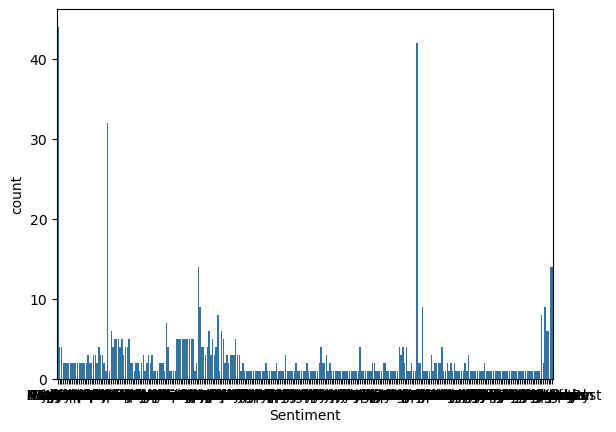

In [37]:
sns.countplot(x="Sentiment", data=data)

In [39]:
#2) Which platform generates the most engagement in terms of likes and retweets?
engagement = data[["Platform", "Likes", "Retweets"]].groupby("Platform").sum()
most_engaged_platform = engagement.idxmax()[["Likes", "Retweets"]]

In [41]:
engagement

,Likes,Retweets
Platform,,
Facebook,9672.0,4844.0
Instagram,11633.0,5831.0
Twitter,5809.0,2918.0
Twitter,4290.0,2151.0


In [43]:
most_engaged_platform

Likes        Instagram 
Retweets     Instagram 
dtype: object

<Axes: xlabel='Platform'>

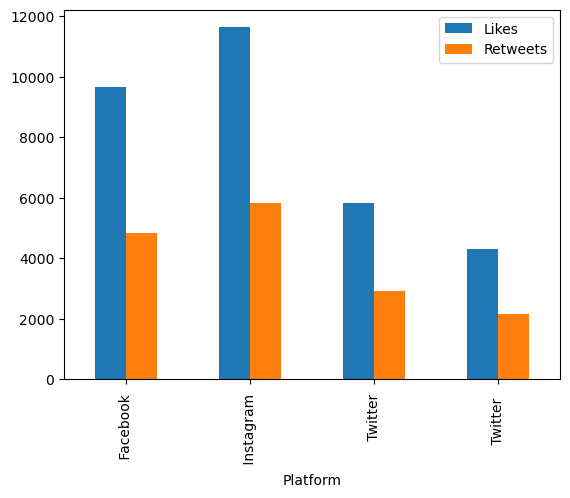

In [51]:
engagement.plot(kind="bar")

In [55]:
#3) Which users have the highest average engagement (likes and retweets per post)?
user_engagement = data[["User", "Likes", "Retweets"]].groupby("User").mean()


In [59]:
top_users = user_engagement.sort_values(by=["Likes", "Retweets"], ascending=False).head(5)

In [69]:
top_users

,Likes,Retweets
User,,
AdeleConcertGoer,80.0,40.0
BieberDanceEnthusiast,80.0,40.0
Bookworm,80.0,40.0
ColorfulLaughter,80.0,40.0
CosmosExplorer,80.0,40.0


<Axes: xlabel='User'>

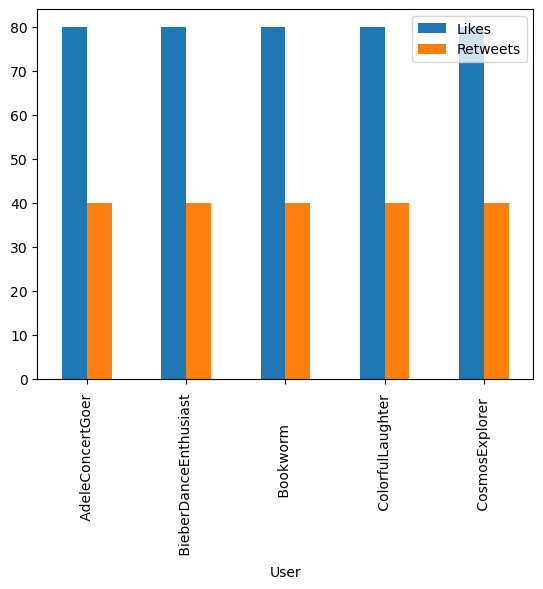

In [73]:
top_users.plot(kind="bar")